In [1]:
!pip install opencv-python pytesseract numpy

  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached pytesseract-0.3.13-py3-none-any.whl.metadata (11 kB)
  Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl (39.0 MB)
Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl (12.6 MB)
Using cached pytesseract-0.3.13-py3-none-any.whl (14 kB)
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.0 MB ? eta -:--:--
   --- ------------------------------------ 0.5/7.0 MB 466.4 kB/s eta 0:00:14
   --- ------------------------------------ 0.5/7.0 MB 466.4 kB/s eta 0:00:14
   ---- ---------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas 2.2.3 requires pytz>=2020.1, which is not installed.
pandas 2.2.3 requires tzdata>=2022.7, which is not installed.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2
import pytesseract
from google.colab.patches import cv2_imshow

image = cv2.imread(f"/content/6.jpg")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray = cv2.adaptiveThreshold(gray, 255,
                             cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                             cv2.THRESH_BINARY, 11, 2)

cv2_imshow(gray)

ImportError: Unable to import required dependencies:
pytz: No module named 'pytz'

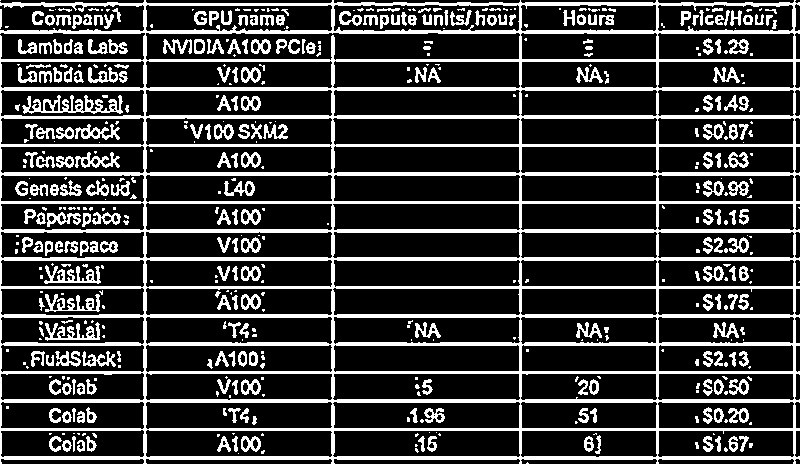

In [ ]:
# Apply Gaussian blur to reduce noise
blurred_gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply adaptive thresholding
improved_gray = cv2.adaptiveThreshold(blurred_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY_INV, 11, 2)

cv2_imshow(improved_gray)

In [ ]:
# Use PSM 6 (Assume a single uniform block of text) or PSM 11 (Sparse text)
custom_config = r'--oem 3 --psm 6'
text_psm = pytesseract.image_to_string(improved_gray, config=custom_config)
print("Detected Text with PSM 6:\n", text_psm)

custom_config_sparse = r'--oem 3 --psm 11'
text_psm_sparse = pytesseract.image_to_string(improved_gray, config=custom_config_sparse)
print("\nDetected Text with PSM 11:\n", text_psm_sparse)

Detected Text with PSM 6:
 company’ | GPU name [Computs‘tnits)hour), “Hours PricelHaury |
PEEL oi E01 VS a ce
RTE BP |
er 0 Ty
Ec <r
Cd
TS |
Er BX
7 Pa
Ee A re”
2 SO 7 CO
SST YT
a OC TS
a Pe
cn YS |


Detected Text with PSM 11:
 any

ina

a

eu a

A

a

er 0 Ty

ce

reed] 9

es

BS eS ST

rc |

SS

a a er

west |e

SS Yr

CC |

a a a

cn YS |



In [ ]:
text = pytesseract.image_to_string(improved_gray)
print("Detected Text:\n", text)

Detected Text:
 EL Late co
a a
a
er 0 Ty
Sr
reed] 9 es
TS |

Er BX
7 Pa
Ee A re”
rr
SST YT
a
a Pe
cn YS |

 



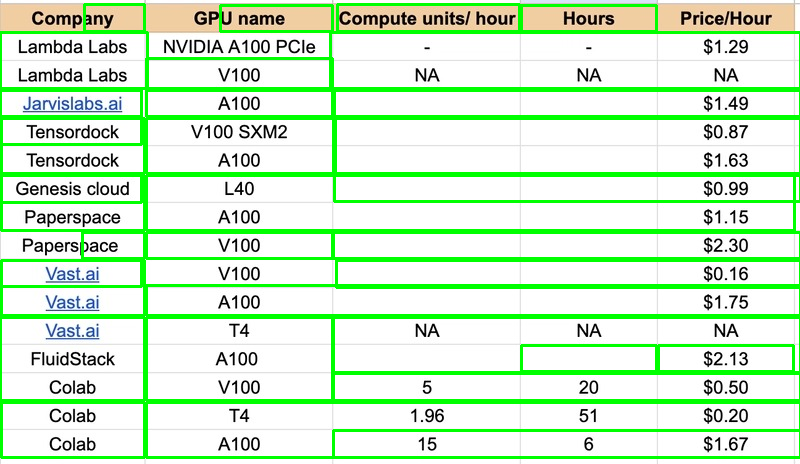

In [ ]:
edges = cv2.Canny(improved_gray, 50, 150)

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image_with_rectangles = image.copy()

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if w > 50 and h > 20:
        cv2.rectangle(image_with_rectangles, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(image_with_rectangles)

In [ ]:
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if w > 50 and h > 20:
        roi = gray[y:y+h, x:x+w]
        text = pytesseract.image_to_string(roi)
        print(f"Detected Text in Region: {text.strip()}")

Detected Text in Region: 45

$1.67:
Detected Text in Region: ‘74 | 1.96 | 51 |__ $0.20
‘A100. | 45 | 6: | .$1.67.
Detected Text in Region: Colab
Colab
Detected Text in Region: ‘20

$0.50
Detected Text in Region: 5 $2.13,
Detected Text in Region: 
Detected Text in Region: NA NA
Detected Text in Region: 'T4.
‘A100
100
Detected Text in Region: {Vast.ai:
FluidStack:
Colab
Detected Text in Region: ‘A100 | $4.75
Detected Text in Region: $0.16.
Detected Text in Region: 
Detected Text in Region: 
Detected Text in Region: . $2.30.
Detected Text in Region: ¥100
Detected Text in Region: Dace
Detected Text in Region: $0.99
Detected Text in Region: Lao | | |__ :$0.99

 

‘A100 ] | \ $145
Detected Text in Region: Genesis cloud»
Paperspace ;
Detected Text in Region: Genesis cloud.
Detected Text in Region: $0.87
$1.63
Detected Text in Region: 
Detected Text in Region: JTensordock

-Tensordock
Detected Text in Region: ‘Tensordock
Detected Text in Region: 
Detected Text in Region: ‘A100
Detected Text in